# **Apple Stock Prices Prediction Model**

## **Theme**
**Financial Stock Prediction**

## **Group 27, Sem 2 2023-2024**

1. WEE DUN YING (23005029)

2. LIM HONG YU (23004973)

3. PAVEENDRAN A/L SRIDHARAN (23065763)

4. TEOH JIA YONG (23004885)

5. HERMAN LAI YEYOU (23063501)

6. KEAT TERNG CONG (23063762)

## **Data Collection**

After making thorough search on suitable dataset about the theme that has been decided early, we put effort in searching dataset in various resources including the Government official dataset and also open sources api from all around the world. Lastly, we finalise the decision of using apple stock data. We pick the dataset of 10 years from 8th of May 2024. The link attached below is the source of the dataset:
https://finance.yahoo.com/quote/AAPL/history/

## **Import libraries**


In [ ]:
#Data pre-processing
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from re import subn
from seaborn import heatmap
from sklearn.model_selection import train_test_split

#Model Selection
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from  scipy.stats import shapiro

#Hyperparameter Tuning
from tensorflow.keras.optimizers import Adam, RMSprop
from itertools import product

### **Data pre-processing** :

*   **datetime** : Used for manipulating dates and times.

*   **pandas (imported as pd)** : A powerful library for data manipulation and analysis, especially useful for manipulating structured data like CSV files.

*  **numpy (imported as np)** : Adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

*   **matplotlib.pyplot (imported as plt) and seaborn (imported as sns)** : These libraries are used for creating static, interactive, and animated visualizations in Python. Seaborn is based on matplotlib and provides a high-level interface for drawing attractive statistical graphics.

*   **MinMaxScaler** : Part of the scikit-learn library, this tool scales features to a given range, typically 0 to 1, which is important for many machine learning algorithms.

*   **re.subn** : Used for replacing patterns in strings, which can be useful for data cleaning.

*   **seaborn.heatmap** : A function used to create heatmaps, which are visual representations of data where the individual values contained in a matrix are represented as colors.

*   **train_test_split** : This function from scikit-learn is used to split a dataset into a training set and a testing set. This allows for the assessment of the performance of your model.

### **Model Selection** :

*   **tensorflow.keras (Sequential, LSTM, Dense, Dropout)** : These are components from TensorFlow, a deep learning library. Sequential is a type of model that is a linear stack of layers. LSTM is a type of recurrent neural network (RNN) useful for sequence prediction problems. Dense is a standard fully connected neural network layer, and Dropout is a technique used to prevent overfitting.

*   **sklearn.metrics (mean_squared_error, mean_absolute_error, r2_score)** : These functions are used to evaluate the accuracy of regression models.

*   **math.sqrt** : Used to compute the square root, often used in calculating the root mean square error (RMSE).

*   **Regression models (Lasso, DecisionTreeRegressor, RandomForestRegressor, SVR, GradientBoostingRegressor)** : These are different types of regression models from the scikit-learn library, used depending on the nature of the problem and data.

*   **shapiro** : From SciPy, used for performing the Shapiro-Wilk test for normality. This is useful to check assumptions in some statistical tests and models.

### **Hyperparameter Tuning** :

*   **Adam and RMSprop** : These are types of optimization algorithms used in neural networks to change the attributes of the neural network such as weights and learning rate in order to reduce the losses.

*   **product from itertools** : Useful for creating Cartesian products of input iterables. This is helpful in hyperparameter tuning, where you might want to try all combinations of certain parameters.

## **Data pre-processing**

### Draft view of Data




In [ ]:
# Mount at GitHub for easier access

!git clone https://github.com/peterlimhy/WIA1005ML-Assignment.git

In [ ]:
#Loading the data for 10 years
DATA_DIR = "AAPL.csv"
apple_stocks_df = pd.read_csv(DATA_DIR, parse_dates=['Date'], index_col='Date') #Set Date as index
apple_stocks_df.index = pd.to_datetime(apple_stocks_df.index)

#create a backup data
apple_stock_backup = apple_stocks_df.copy()

start_time = "2014-05-09"
end_time = "2024-05-08"

apple_stocks_df = apple_stocks_df.loc[start_time:end_time]
print("Start time (2014-05-09)")
print(apple_stocks_df.head(5))

Start time (2014-05-09)
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-05-09  20.876429  20.937500  20.726070  20.912144  18.522615  291597600
2014-05-12  20.981787  21.202143  20.978571  21.172501  18.753235  213208800
2014-05-13  21.142857  21.233570  21.096430  21.205713  18.782639  159737200
2014-05-14  21.158215  21.335714  21.133572  21.209642  18.786127  166404000
2014-05-15  21.239286  21.307142  21.001429  21.029285  18.626375  230846000


First, we load a 10-year dataset of Apple's stock prices from a CSV file, set the date as the index for time series analysis, create a backup of the original data for safety, and filter the dataset to include only entries between May 9, 2014, and May 8, 2024. Finally, it prints the start date and the first five records of the filtered dataset to verify that the data has been loaded and filtered correctly.


In [ ]:
print("End time (2024-05-08)")
print(apple_stocks_df.tail(5))

End time (2024-05-08)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-02  172.509995  173.419998  170.889999  173.029999  173.029999   
2024-05-03  186.649994  187.000000  182.660004  183.380005  183.380005   
2024-05-06  182.350006  184.199997  180.419998  181.710007  181.710007   
2024-05-07  183.449997  184.899994  181.320007  182.399994  182.399994   
2024-05-08  182.850006  183.070007  181.449997  182.740005  182.740005   

               Volume  
Date                   
2024-05-02   94214900  
2024-05-03  163224100  
2024-05-06   78569700  
2024-05-07   77305800  
2024-05-08   45033300  


Then we print the last five records of the Apple stock prices dataset to show the data entries as of May 8, 2024.

### Remove if there is null value



In [ ]:
#Check data types
print("Data Types")
print(apple_stocks_df.dtypes)

#Check for any missing value
print("\n\nMissing values")
print(apple_stocks_df.isna().sum())

Data Types
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


Missing values
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


After that, we check the datatypes by printing the data types of each column in the DataFrame to ensure they are appropriate for analysis or modeling. Then, we calculate and print the number of missing values in each column, helping to identify if any data preprocessing like filling or removing missing values is needed.

### Check Outliers with Boxplot

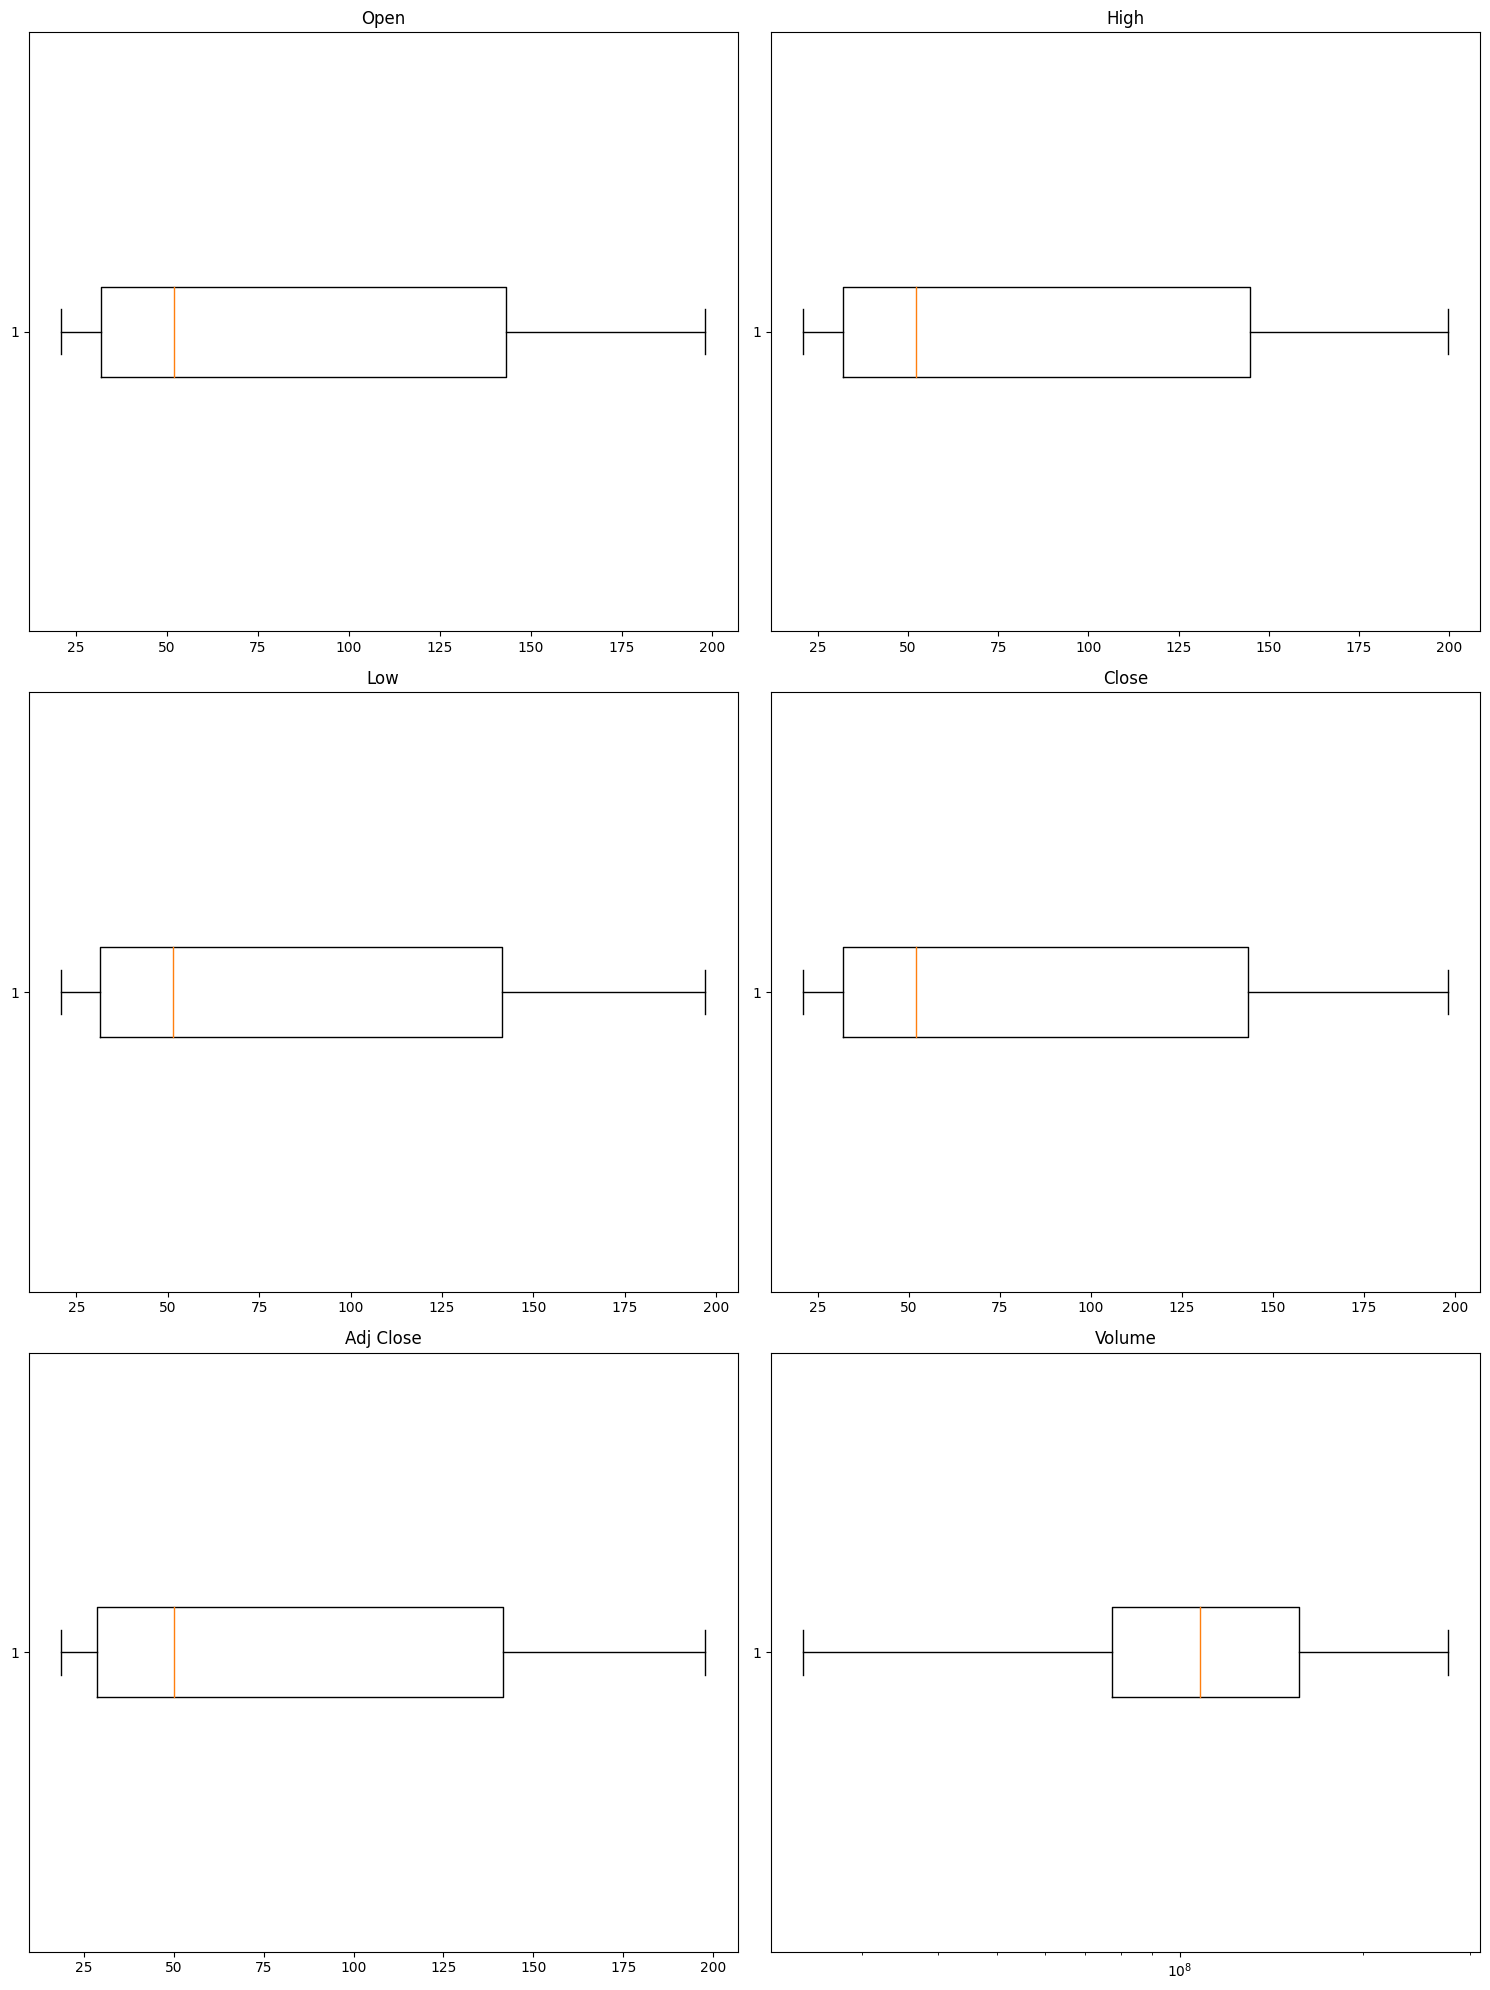

In [ ]:
fig, ax = plt.subplots(((len(apple_stocks_df.columns) + 1) // 2), 2, figsize=(15, 20))

for i, col in enumerate(apple_stocks_df.columns):
    # Create a boxplot for each column in the specified subplot
    bp = ax[i // 2, i % 2].boxplot(apple_stocks_df[col], vert=False, showfliers=False)

    # Use logarithmic scale for specific plots
    if col == 'Volume':
        ax[i // 2, i % 2].set_xscale('log')

    # Set title for the subplot based on the column name
    ax[i // 2, i % 2].set_title(col)

plt.tight_layout()
plt.show()


Next, we check the outliers by creating a set of boxplots for each column in a DataFrame of Apple stock prices. It arranges the plots in a grid, with two plots per row, and sets the figure size. The boxplots are horizontal, exclude outliers, and for the 'Volume' column, it uses a logarithmic scale to handle wide data ranges. Each subplot is labeled with the name of its respective column. The layout is adjusted for clear visualization, and the plots are displayed on the screen.

### Visualise Data

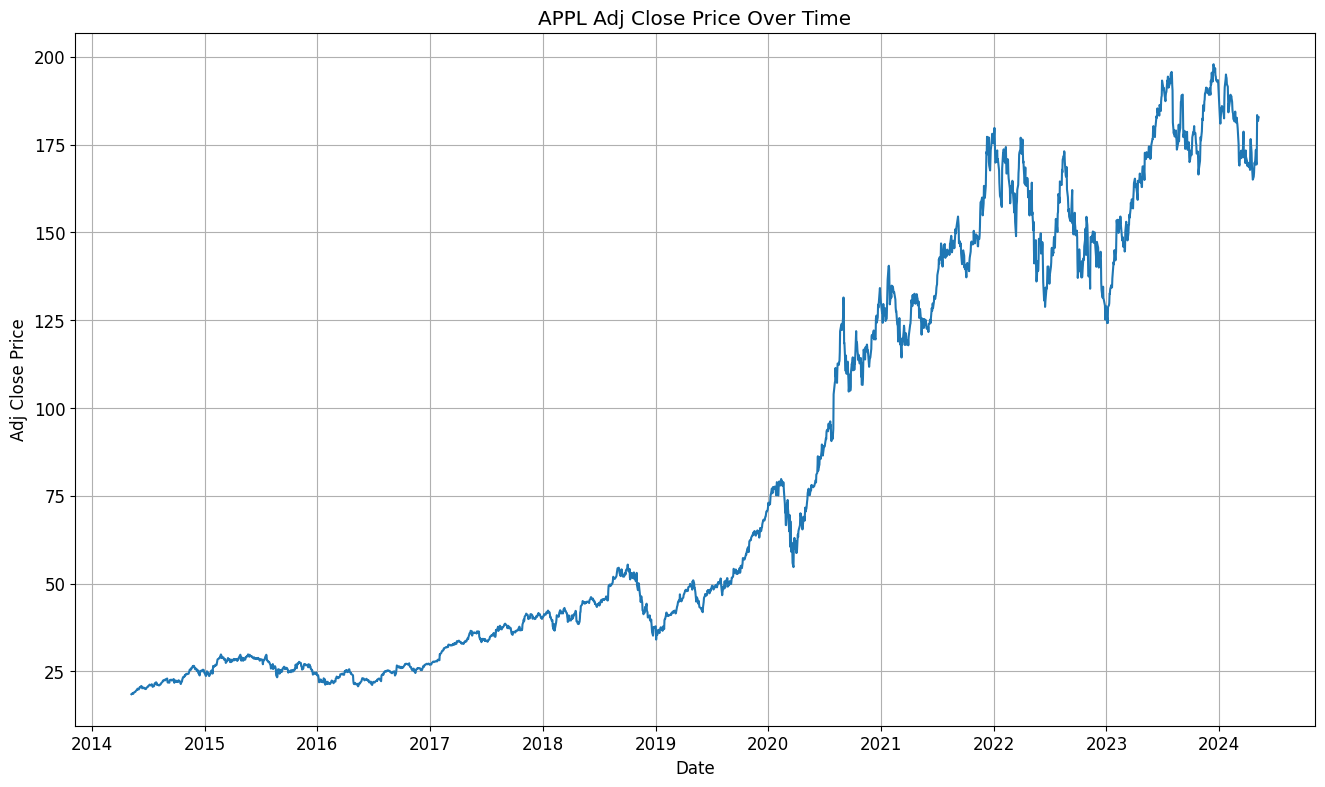

In [ ]:
#Visualing the data
X = apple_stocks_df.iloc[:, 0:5]
y = apple_stocks_df.iloc[:, 5:6]

plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

plt.plot(apple_stocks_df.index, apple_stocks_df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('APPL Adj Close Price Over Time')
plt.show()


Now, we visualize the adjusted close price ('Adj Close') of Apple's stock over time as a line plot. It configures the plot size, grid, and font settings for better readability, labels the axes, titles the plot, and displays it. This helps in analyzing the trend of the stock price across the dates provided in the dataset.

### Removing outliers

In [ ]:
# Calculate the quantiles and IQR
Q1 = apple_stocks_df.quantile(0.25)
Q3 = apple_stocks_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper fences for outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("IQR:")
print(IQR)
print("\nLower fence:")
print(lower_fence)
print("\nUpper fence:")
print(upper_fence)

# Identifying outliers
outliers = apple_stocks_df[((apple_stocks_df < (Q1 - 1.5 * IQR)) | (apple_stocks_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nOutliers:")
print(outliers)


IQR:
Open         1.113500e+02
High         1.128100e+02
Low          1.098050e+02
Close        1.113850e+02
Adj Close    1.131259e+02
Volume       7.969240e+07
dtype: float64

Lower fence:
Open        -1.352050e+02
High        -1.371850e+02
Low         -1.331425e+02
Close       -1.353025e+02
Adj Close   -1.411139e+02
Volume      -4.210580e+07
dtype: float64

Upper fence:
Open         3.101950e+02
High         3.140550e+02
Low          3.060775e+02
Close        3.102375e+02
Adj Close    3.113898e+02
Volume       2.766638e+08
dtype: float64

Outliers:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-05-09   20.876429   20.937500   20.726070   20.912144   18.522615   
2014-05-19   21.351786   21.690357   21.333214   21.592501   19.125231   
2014-05-27   21.995714   22.352142   21.986786   22.343929   19.790806   
2014-05-28   22.357857   22.493929   22.277857   22.286072   19.739548   

Afterwards, we calculate the interquartile range (IQR) for each column in a DataFrame, defines outlier boundaries (lower and upper fences), and identifies any rows with outliers. Then, we print the IQR, both fences, and the rows considered outliers based on these criteria.

In [ ]:
apple_stocks_outliers_removed_df = apple_stocks_df[~((apple_stocks_df < (Q1 - 1.5 * IQR)) | (apple_stocks_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Removed outliers")
print(apple_stocks_outliers_removed_df)

Removed outliers
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-05-12   20.981787   21.202143   20.978571   21.172501   18.753235   
2014-05-13   21.142857   21.233570   21.096430   21.205713   18.782639   
2014-05-14   21.158215   21.335714   21.133572   21.209642   18.786127   
2014-05-15   21.239286   21.307142   21.001429   21.029285   18.626375   
2014-05-16   21.022499   21.340357   20.907143   21.339643   18.901268   
...                ...         ...         ...         ...         ...   
2024-05-02  172.509995  173.419998  170.889999  173.029999  173.029999   
2024-05-03  186.649994  187.000000  182.660004  183.380005  183.380005   
2024-05-06  182.350006  184.199997  180.419998  181.710007  181.710007   
2024-05-07  183.449997  184.899994  181.320007  182.399994  182.399994   
2024-05-08  182.850006  183.070007  181.449997  182.740005  182.740005   

               Volum

After finding the outliers, we remove rows that contain outliers from the Apple stock prices DataFrame and then prints the resulting DataFrame without these outliers. It uses the previously calculated lower and upper fences based on the IQR to determine which rows to exclude.

### Feature engineering

In [ ]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for the 'Adj Close' column
apple_stocks_outliers_removed_df['RSI'] = calculate_rsi(apple_stocks_outliers_removed_df['Adj Close'])

# Create lagged features for 'Adj Close'
apple_stocks_outliers_removed_df['Adj Close Lag 1'] = apple_stocks_outliers_removed_df['Adj Close'].shift(1)

# Create Exponential Moving Average (EMA) for 'Adj Close'
apple_stocks_outliers_removed_df['EMA'] = apple_stocks_outliers_removed_df['Adj Close'].ewm(span=12, adjust=False).mean()

# Create date time features
apple_stocks_outliers_removed_df['Year'] = apple_stocks_outliers_removed_df.index.year
apple_stocks_outliers_removed_df['Month'] = apple_stocks_outliers_removed_df.index.month
apple_stocks_outliers_removed_df['Day'] = apple_stocks_outliers_removed_df.index.day
apple_stocks_outliers_removed_df['DayOfWeek'] = apple_stocks_outliers_removed_df.index.dayofweek
apple_stocks_outliers_removed_df['Quarter'] = apple_stocks_outliers_removed_df.index.quarter

# Create cyclical features
apple_stocks_outliers_removed_df['sin_month'] = numpy.sin(2 * numpy.pi * apple_stocks_outliers_removed_df['Month'] / 12)
apple_stocks_outliers_removed_df['cos_month'] = numpy.cos(2 * numpy.pi * apple_stocks_outliers_removed_df['Month'] / 12)
apple_stocks_outliers_removed_df['DayOfWeek_sin'] = numpy.sin(2 * numpy.pi * apple_stocks_outliers_removed_df['DayOfWeek'] / 7)
apple_stocks_outliers_removed_df['DayOfWeek_cos'] = numpy.cos(2 * numpy.pi * apple_stocks_outliers_removed_df['DayOfWeek'] / 7)

#Drop basic date-time features
apple_stocks_outliers_removed_df.drop(['Year', 'Month', 'Day', 'DayOfWeek','Quarter'], axis=1, inplace=True)

# Display the first few rows to confirm the new features
apple_stocks_outliers_removed_df.head()

<ipython-input-10-1b7a153a152a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks_outliers_removed_df['RSI'] = calculate_rsi(apple_stocks_outliers_removed_df['Adj Close'])
<ipython-input-10-1b7a153a152a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks_outliers_removed_df['Adj Close Lag 1'] = apple_stocks_outliers_removed_df['Adj Close'].shift(1)
<ipython-input-10-1b7a153a152a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Open,High,Low,Close,Adj Close,Volume,RSI,Adj Close Lag 1,EMA,sin_month,cos_month,DayOfWeek_sin,DayOfWeek_cos
Date,,,,,,,,,,,,,
2014-05-12,20.981787,21.202143,20.978571,21.172501,18.753235,213208800,NaN,NaN,18.753235,0.5,-0.866025,0.000000,1.000000
2014-05-13,21.142857,21.233570,21.096430,21.205713,18.782639,159737200,NaN,18.753235,18.757759,0.5,-0.866025,0.781831,0.623490
2014-05-14,21.158215,21.335714,21.133572,21.209642,18.786127,166404000,NaN,18.782639,18.762123,0.5,-0.866025,0.974928,-0.222521
2014-05-15,21.239286,21.307142,21.001429,21.029285,18.626375,230846000,NaN,18.786127,18.741239,0.5,-0.866025,0.433884,-0.900969
2014-05-16,21.022499,21.340357,20.907143,21.339643,18.901268,276256400,NaN,18.626375,18.765859,0.5,-0.866025,-0.433884,-0.900969



*   In this code snippet, we first implement a function calculate_rsi to compute the Relative Strength Index (RSI), a popular momentum indicator in stock trading. It applies this function to the 'Adj Close' column to add an 'RSI' feature.

*   Then, we create a lagged feature 'Adj Close Lag 1' which shifts the 'Adj Close' data by one day, helping to analyze how previous day's prices influence current prices.

*   Next, we calculate the Exponential Moving Average for the 'Adj Close' using a 12-day span, which helps in identifying trends by smoothing out price data.

*   After that, we extract date-based features like year, month, day, day of the week, and quarter from the index (date) of the DataFrame and convert some time-related features into cyclical representations using sine and cosine transformations. This is particularly useful for models that need to understand the cyclicity of days and months.

*   Then drop the original date-time features that were converted into cyclical ones, reducing redundancy and focusing on features that provide the most utility for time series analysis.

*   Lastly, we display the first few rows of the updated DataFrame to verify the successful addition and transformation of these features.

In [ ]:
# check sum of NA value in dataframe before dropping
print("Before dropping")
print(apple_stocks_outliers_removed_df.isna().sum())

# drop any null value from the dataframe
apple_stocks_outliers_removed_df.dropna(inplace=True)

# view dataframe after NaN removal
print()
print("After dropping")
print(apple_stocks_outliers_removed_df.isna().sum())
apple_stocks_outliers_removed_df.head()

Before dropping
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
RSI                13
Adj Close Lag 1     1
EMA                 0
sin_month           0
cos_month           0
DayOfWeek_sin       0
DayOfWeek_cos       0
dtype: int64

After dropping
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
RSI                0
Adj Close Lag 1    0
EMA                0
sin_month          0
cos_month          0
DayOfWeek_sin      0
DayOfWeek_cos      0
dtype: int64


<ipython-input-11-184e44f588af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks_outliers_removed_df.dropna(inplace=True)


,Open,High,Low,Close,Adj Close,Volume,RSI,Adj Close Lag 1,EMA,sin_month,cos_month,DayOfWeek_sin,DayOfWeek_cos
Date,,,,,,,,,,,,,
2014-06-16,22.877501,23.187500,22.862499,23.049999,20.416189,142244000,75.213280,20.212471,19.849735,1.224647e-16,-1.0,0.000000,1.000000
2014-06-17,23.077499,23.174999,22.950001,23.020000,20.389620,118904000,74.612156,20.416189,19.932794,1.224647e-16,-1.0,0.781831,0.623490
2014-06-18,23.067499,23.072500,22.837500,23.045000,20.411760,134056000,74.556560,20.389620,20.006481,1.224647e-16,-1.0,0.974928,-0.222521
2014-06-19,23.072500,23.075001,22.834999,22.965000,20.340900,142112000,72.969353,20.411760,20.057930,1.224647e-16,-1.0,0.433884,-0.900969
2014-06-23,22.830000,22.905001,22.650000,22.707500,20.112827,174776000,71.525487,20.340900,20.066376,1.224647e-16,-1.0,0.000000,1.000000


Now, we check for and display the number of missing values in each column of a DataFrame. Then, remove any rows with missing values and confirms the removal by checking for missing values again. Finally, the first few rows of the updated DataFrame will be displayed to ensure it is now free of any missing data.

### Data scaling

In [ ]:
#Scale data using Min Max scaling
scale_features = [col for col in apple_stocks_outliers_removed_df.columns if 'sin' not in col and 'cos' not in col]

# Apply MinMaxScaler to these selected features
scaler1 = MinMaxScaler()
apple_stocks_df_scaled = apple_stocks_outliers_removed_df.copy()
apple_stocks_df_scaled[scale_features] = scaler1.fit_transform(apple_stocks_outliers_removed_df[scale_features])

print("Scaled data head")
print(apple_stocks_df_scaled.head())

print()
print("Scaled data tail")
print(apple_stocks_df_scaled.tail())

Scaled data head
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2014-06-16  0.002151  0.002896  0.002577  0.002734   0.002390  0.469161   
2014-06-17  0.003290  0.002826  0.003079  0.002564   0.002241  0.376517   
2014-06-18  0.003233  0.002246  0.002434  0.002706   0.002365  0.436660   
2014-06-19  0.003262  0.002261  0.002420  0.002250   0.001967  0.468637   
2014-06-23  0.001880  0.001300  0.001360  0.000783   0.000685  0.598293   

                 RSI  Adj Close Lag 1       EMA     sin_month  cos_month  \
Date                                                                       
2014-06-16  0.765122         0.001245  0.000000  1.224647e-16       -1.0   
2014-06-17  0.758737         0.002390  0.000475  1.224647e-16       -1.0   
2014-06-18  0.758146         0.002241  0.000896  1.224647e-16       -1.0   
2014-06-19  0.741287         0.002365  0.001190  1.224647e-16       -1.0   
2

Then, we apply Min-Max scaling to selected features in the DataFrame, excluding trigonometric features to normalize their values between 0 and 1. It copies the DataFrame, applies the scaling, and then prints the first and last few records to display the scaled data.

In [ ]:
apple_stocks_df_scaled.to_csv('apple_stocks_df_scaled.csv', index=False)

And this save the scaled Apple stocks DataFrame to a CSV file named 'apple_stocks_df_scaled.csv'. It ensures that the DataFrame's index is not included in the output file.

### Correlation

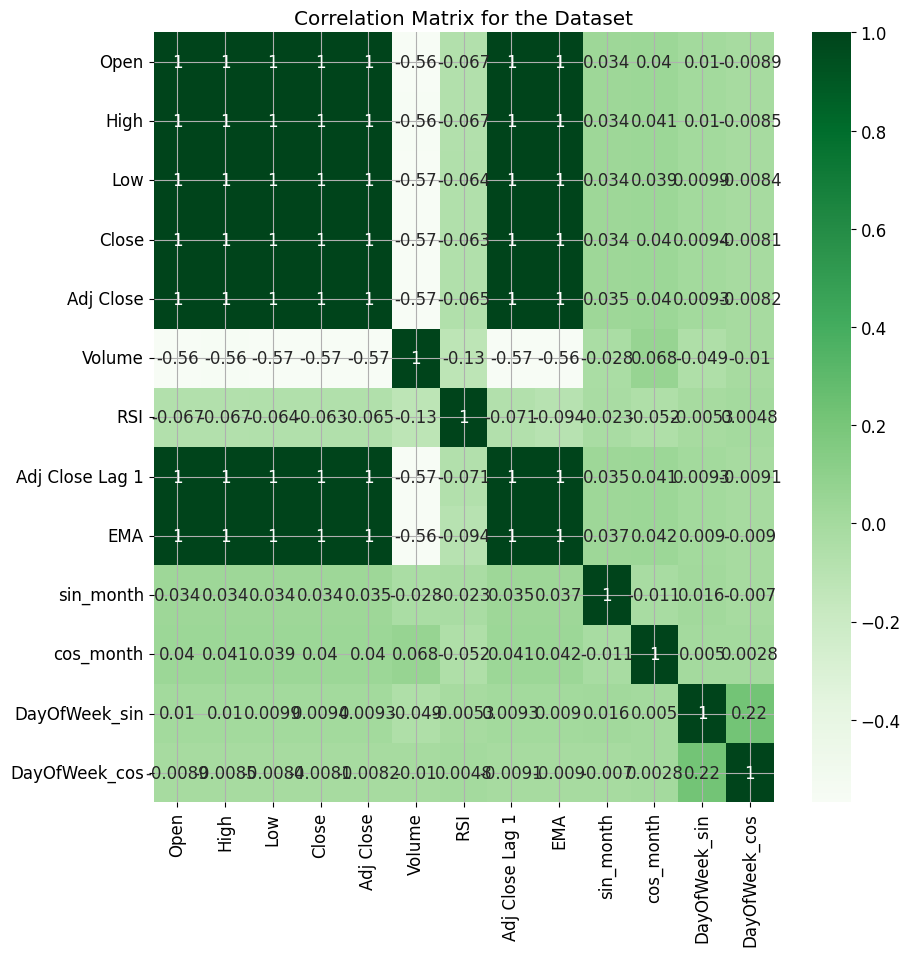

In [ ]:
# Size of the figure to be printed

plt.figure(figsize = (10,10))

# Create correlation matrix using df_withoutSex.corr and generate a heatmap using sns.heatmap

sns.heatmap(apple_stocks_df_scaled.corr(), annot = True, cmap = sns.color_palette('Greens', as_cmap=True))

# Set the title

plt.title('Correlation Matrix for the Dataset')

# Show the plot

plt.show()

In this correlation part, we generate a heatmap of the correlation matrix for the scaled Apple stocks DataFrame, displaying the interdependencies between features. It sets the size of the plot, uses a green color palette for the heatmap, annotates the plot with correlation coefficients, titles the plot, and displays it. This visual aid helps in understanding how different stock attributes are related to each other.

### Data set splitting

In [ ]:
# Load your DataFrame
# apple_stocks_df_scaled = pd.read_csv('path_to_your_data.csv')  # Uncomment if you need to load the data

# Separate the features and the target variable
X = apple_stocks_df_scaled.drop('Adj Close', axis=1)  # all columns except 'Adj Close'
y = apple_stocks_df_scaled['Adj Close']  # only 'Adj Close'

# Calculate the index to split on, assuming the DataFrame is already sorted chronologically
split_index = int(len(X) * 0.8)

# Splitting the dataset chronologically
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Training Features:")
print(X_train.head(5))
print("\nTraining Labels:")
print(y_train.head(5))
print("\nTesting Features :")
print(X_test.head(5))
print("\nTesting Labels :")
print(y_test.head(5))


Training Features:
                Open      High       Low     Close    Volume       RSI  \
Date                                                                     
2014-06-16  0.002151  0.002896  0.002577  0.002734  0.469161  0.765122   
2014-06-17  0.003290  0.002826  0.003079  0.002564  0.376517  0.758737   
2014-06-18  0.003233  0.002246  0.002434  0.002706  0.436660  0.758146   
2014-06-19  0.003262  0.002261  0.002420  0.002250  0.468637  0.741287   
2014-06-23  0.001880  0.001300  0.001360  0.000783  0.598293  0.725950   

            Adj Close Lag 1       EMA     sin_month  cos_month  DayOfWeek_sin  \
Date                                                                            
2014-06-16         0.001245  0.000000  1.224647e-16       -1.0       0.000000   
2014-06-17         0.002390  0.000475  1.224647e-16       -1.0       0.781831   
2014-06-18         0.002241  0.000896  1.224647e-16       -1.0       0.974928   
2014-06-19         0.002365  0.001190  1.224647e-16      

To split the data set, this code snippet separate the scaled Apple stocks DataFrame into features and the target variable, and then splitting it into training and testing sets chronologically. It uses 80% of the data for training and the remaining 20% for testing, displaying the first few entries of both sets for verification.

## **Model Selection**

### Methods

In [ ]:
# Function to plot predictions
def plot_predictions(true_values, predicted_values, title):
    plt.figure(figsize=(14,5))
    plt.plot(true_values, label='True')
    plt.plot(predicted_values, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.show()

Inside this code, we define a function plot_predictions that creates a line plot comparing true and predicted values of the 'Adj Close' price over time. It configures the plot size, labels the axes, adds a title and legend, and then displays the plot for visual analysis of prediction accuracy.

###LSTM

Training MAE: 0.003564535156457257
Training MSE: 2.8871833163791927e-05
Training RMSE: 0.005373251637862489
Training R^2: 0.9995722513137483

Testing MAE: 0.013029194603711741
Testing MSE: 0.00025485680181864027
Testing RMSE: 0.015964235084044594
Testing R^2: 0.9770926335816879


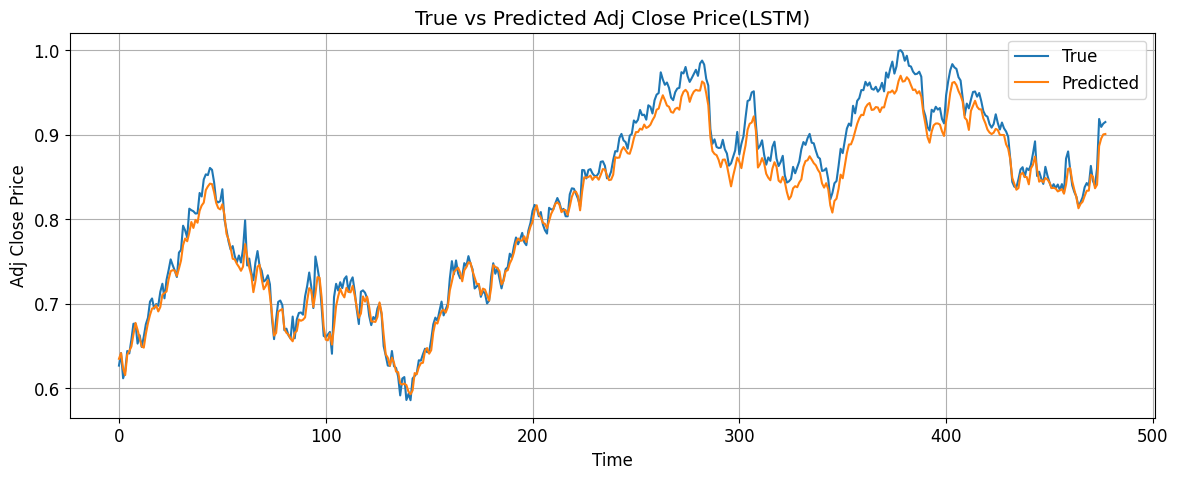

In [ ]:
# Reshape data for LSTM [samples, time steps, features]
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on both training and test data
y_train_pred = lstm_model.predict(X_train_lstm, verbose=0)
y_test_pred = lstm_model.predict(X_test_lstm, verbose=0)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print all training and testing metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print()
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R^2:", test_r2)

# Inverse scaling the predictions and the actual values for plotting
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_pred_inverse = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_pred_inverse, 'True vs Predicted Adj Close Price(LSTM)')

Now, we build, train, and evaluate an LSTM model for predicting Apple's adjusted closing stock price by reshaping data for LSTM input then build the LSTM model with 100 units and dropout. After that, we compile the model using Adam optimizer and mean squared error loss. Then, we train train the model on the training set with 50 epochs and make predictions on training and testing data. Before we inverse scales predictions and actual values for plotting, we calculate performance metrics (MAE, MSE, RMSE, R²) for both sets. Finally, we plot true vs. predicted prices to visually assess model performance.

### Lasso regression

Training MAE: 0.03198545126859086
Training MSE: 0.0014654745233350316
Training RMSE: 0.03828151673242626
Training R^2: 0.9782883615828695

Testing MAE: 0.0921409175061145
Testing MSE: 0.008889356868820805
Testing RMSE: 0.09428338596391628
Testing R^2: 0.20099540775793856


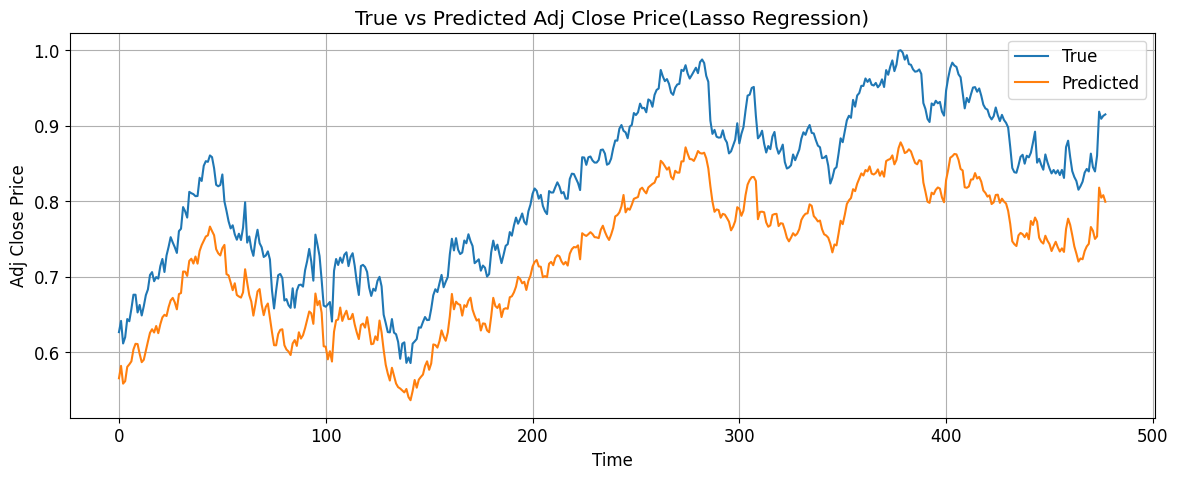

In [ ]:
# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.01)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the training and testing set
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print all training and testing metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print()
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R^2:", test_r2)

# Inverse scaling the predictions to get original scale
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_test_pred_inverse = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_test_pred_inverse, 'True vs Predicted Adj Close Price(Lasso Regression)')

To train and evaluate a Lasso regression model for predicting Apple's adjusted closing stock price, first, we initialize the Lasso regression model with an alpha of 0.01. Then, we train the model on the training data and predict 'Adj Close' prices for both training and testing data. Next, we compute and print MAE, MSE, RMSE, and R² for training and testing sets to evaluate model performance. Lastly, we scale the predicted and actual 'Adj Close' prices back to their original values for comparison and plot true vs. predicted adjusted close prices using the plot_predictions function to visually assess the model's accuracy.

### Decision tree

Training MAE: 0.00030265198806412176
Training MSE: 2.655109795784998e-07
Training RMSE: 0.0005152775752722991
Training R^2: 0.9999960663400881

Testing MAE: 0.018125469669470068
Testing MSE: 0.0008533186569625566
Testing RMSE: 0.029211618526924464
Testing R^2: 0.9233009164082132


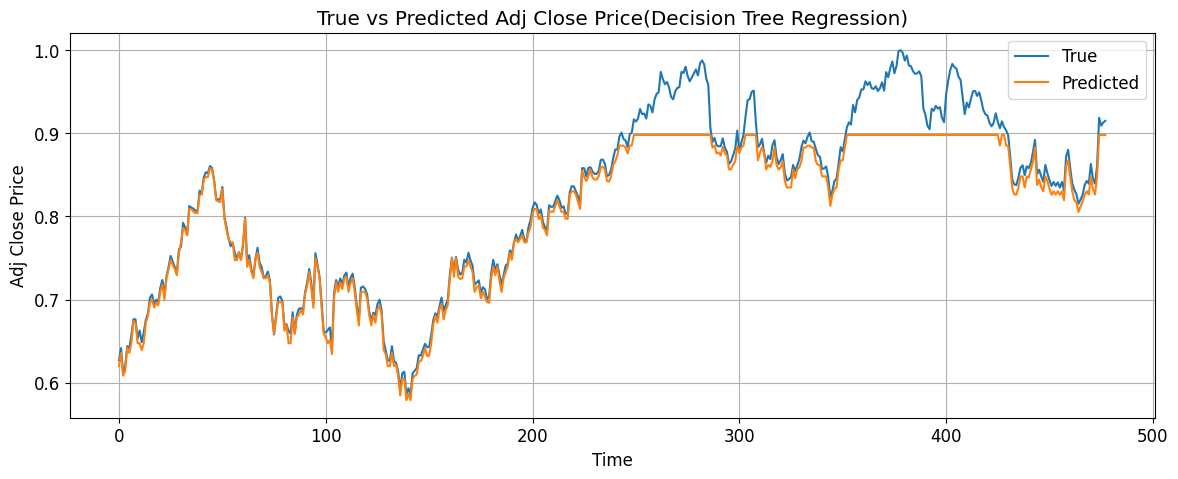

In [ ]:
# Initialize the Decision Tree regression model
dt_model = DecisionTreeRegressor(max_depth=10)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the training and testing set
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print all training and testing metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print()
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R^2:", test_r2)

# Inverse scaling the predictions to get original scale
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_test_pred_inverse = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_test_pred_inverse, 'True vs Predicted Adj Close Price(Decision Tree Regression)')

For Decision Tree regression model, we initialize the Decision Tree regressor with a maximum depth of 10. Then, we train the model on the training data and predict 'Adj Close' prices for both training and testing data. After that,we compute and print MAE, MSE, RMSE, and R² for training and testing sets to evaluate model performance. Lastly, we scale the predicted and actual 'Adj Close' prices back to their original values for comparison and plot true vs. predicted adjusted close prices using the plot_predictions function to visually assess the model's accuracy.

### Random Forest

Training MAE: 0.0004939151876333399
Training MSE: 5.163201623843474e-07
Training RMSE: 0.0007185542167327024
Training R^2: 0.9999923504936492

Testing MAE: 0.019430876223914123
Testing MSE: 0.0010114773508109029
Testing RMSE: 0.03180373171203189
Testing R^2: 0.9090850935368114


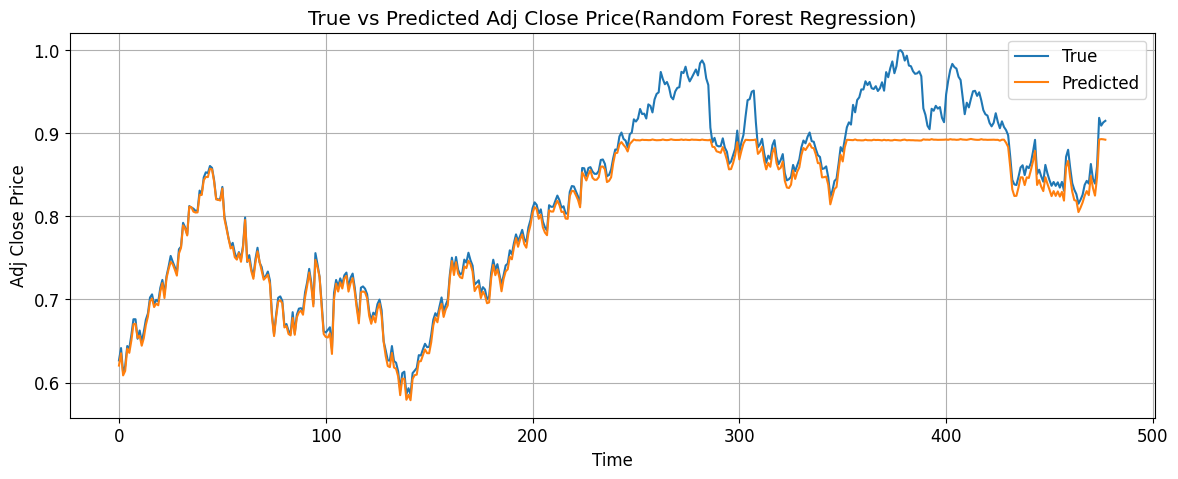

In [ ]:
# Initialize the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the training and testing set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print all training and testing metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print()
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R^2:", test_r2)

# Inverse scaling the predictions to get original scale
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_test_pred_inverse = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_test_pred_inverse, 'True vs Predicted Adj Close Price(Random Forest Regression)')

For the Random Forest regression model, we initialize the Random Forest regressor with 100 estimators, a maximum depth of 10, and a random state of 42. Then, we train the model on the training data and predict 'Adj Close' prices for both training and testing data. After that, we compute and print MAE, MSE, RMSE, and R² for training and testing sets to evaluate model performance. Lastly, we scale the predicted and actual 'Adj Close' prices back to their original values for comparison and plot true vs. predicted adjusted close prices using the plot_predictions function to visually assess the model's accuracy.

### Support vector regression

Training MAE: 0.05199088583613712
Training MSE: 0.0036078971664022593
Training RMSE: 0.06006577366855653
Training R^2: 0.9465474442060924

Testing MAE: 0.12045156982743842
Testing MSE: 0.020336016052309693
Testing RMSE: 0.14260440404247582
Testing R^2: -0.8278679159225988


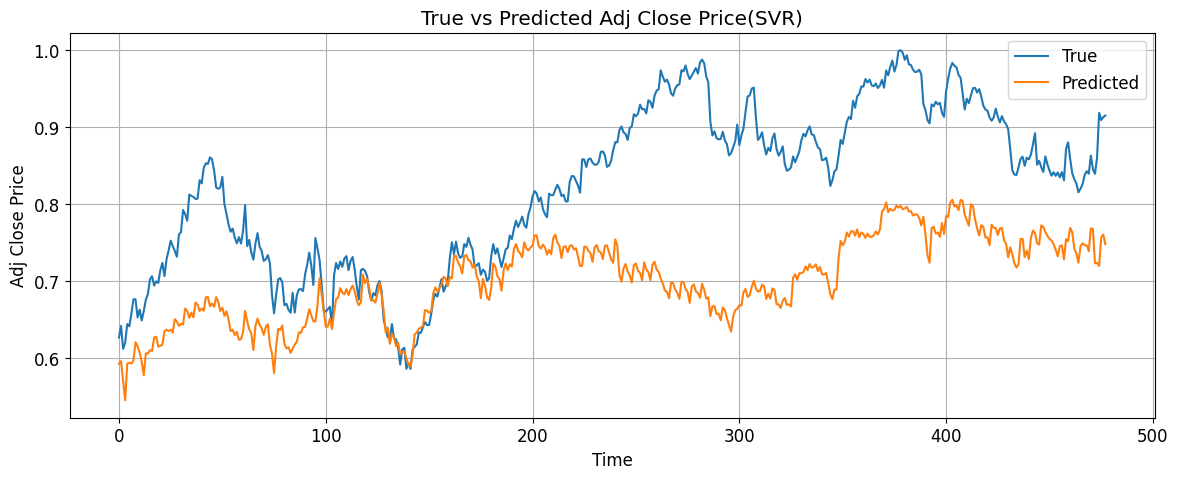

In [ ]:
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the training and testing set
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print all training and testing metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print()
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R^2:", test_r2)

# Inverse scaling the predictions to get original scale
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_test_pred_inverse = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_test_pred_inverse, 'True vs Predicted Adj Close Price(SVR)')

For the SVR model, we initialize the Support Vector Regressor with an RBF kernel, C parameter of 1.0, and epsilon of 0.1. Then, we train the model on the training data and predict 'Adj Close' prices for both training and testing data. After that, we compute and print MAE, MSE, RMSE, and R² for training and testing sets to evaluate model performance. Lastly, we scale the predicted and actual 'Adj Close' prices back to their original values for comparison and plot true vs. predicted adjusted close prices using the plot_predictions function to visually assess the model's accuracy.

### Gradient booster machine

Training MAE: 0.0011351991229255102
Training MSE: 2.200484037724142e-06
Training RMSE: 0.0014834028575286425
Training R^2: 0.9999673988779681

Testing MAE: 0.018672595736048077
Testing MSE: 0.0009057278653132666
Testing RMSE: 0.030095313012382288
Testing R^2: 0.9185902046249047


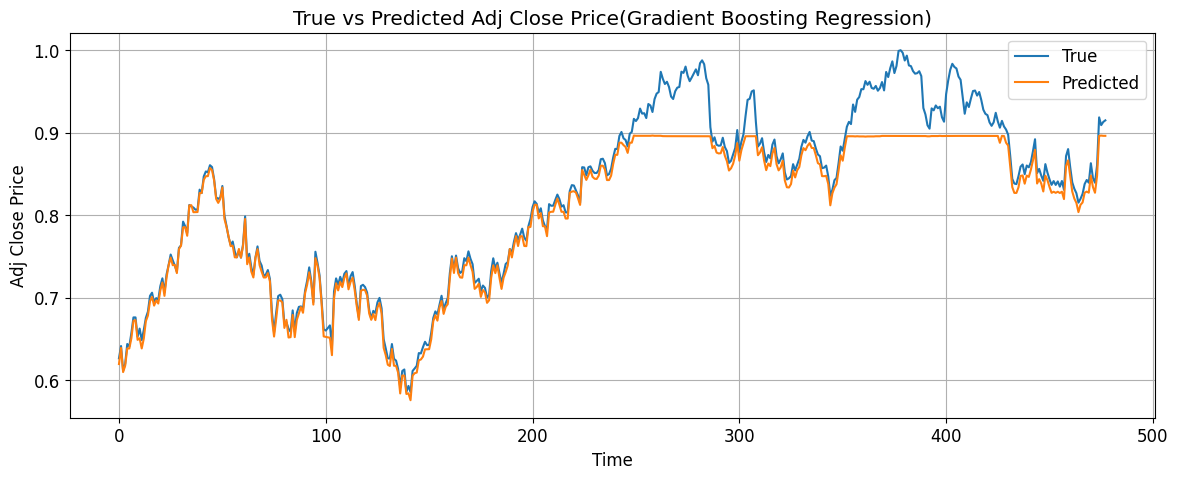

In [ ]:
# Initialize the Gradient Boosting Regression model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Predict on the training and testing set
y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print all training and testing metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print()
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R^2:", test_r2)

# Inverse scaling the predictions to get original scale
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_test_pred_inverse = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_test_pred_inverse, 'True vs Predicted Adj Close Price(Gradient Boosting Regression)')

For the Gradient Boosting Regression model, we initialize the Gradient Boosting Regressor with 100 estimators, a learning rate of 0.1, a max depth of 3, and a random state of 42. Then, we train the model on the training data and predict 'Adj Close' prices for both training and testing data. After that, we compute and print MAE, MSE, RMSE, and R² for training and testing sets to evaluate model performance. Lastly, we scale the predicted and actual 'Adj Close' prices back to their original values for comparison and plot true vs. predicted adjusted close prices using the plot_predictions function to visually assess the model's accuracy.

### Neural network model

Training MAE: 0.002492381612418396
Training MSE: 1.4010343510986618e-05
Training RMSE: 0.0037430393413623933
Training R^2: 0.9997924307058453

Testing MAE: 0.009446080054503694
Testing MSE: 0.0001305678425009181
Testing RMSE: 0.011426628658572838
Testing R^2: 0.988264133469173


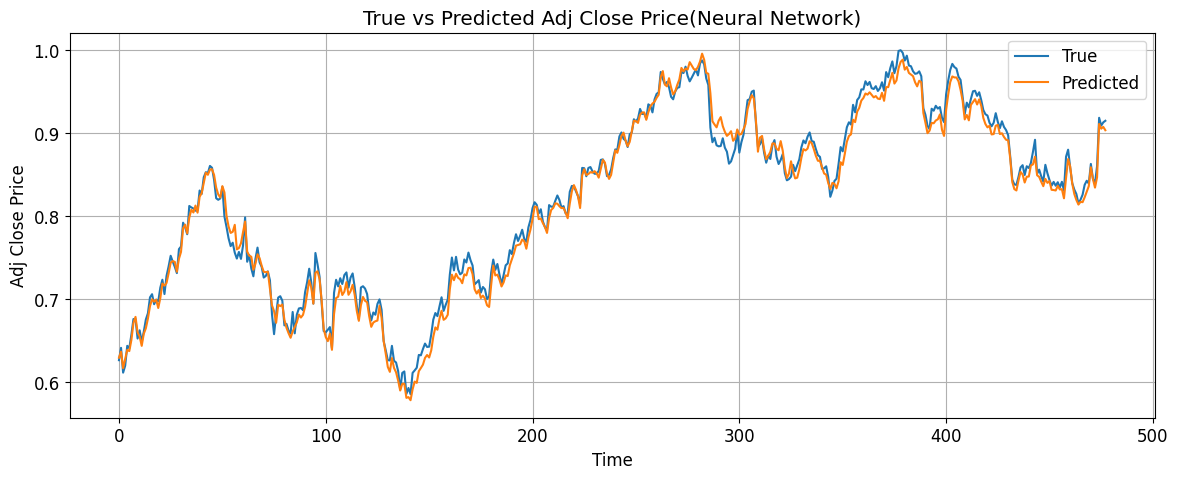

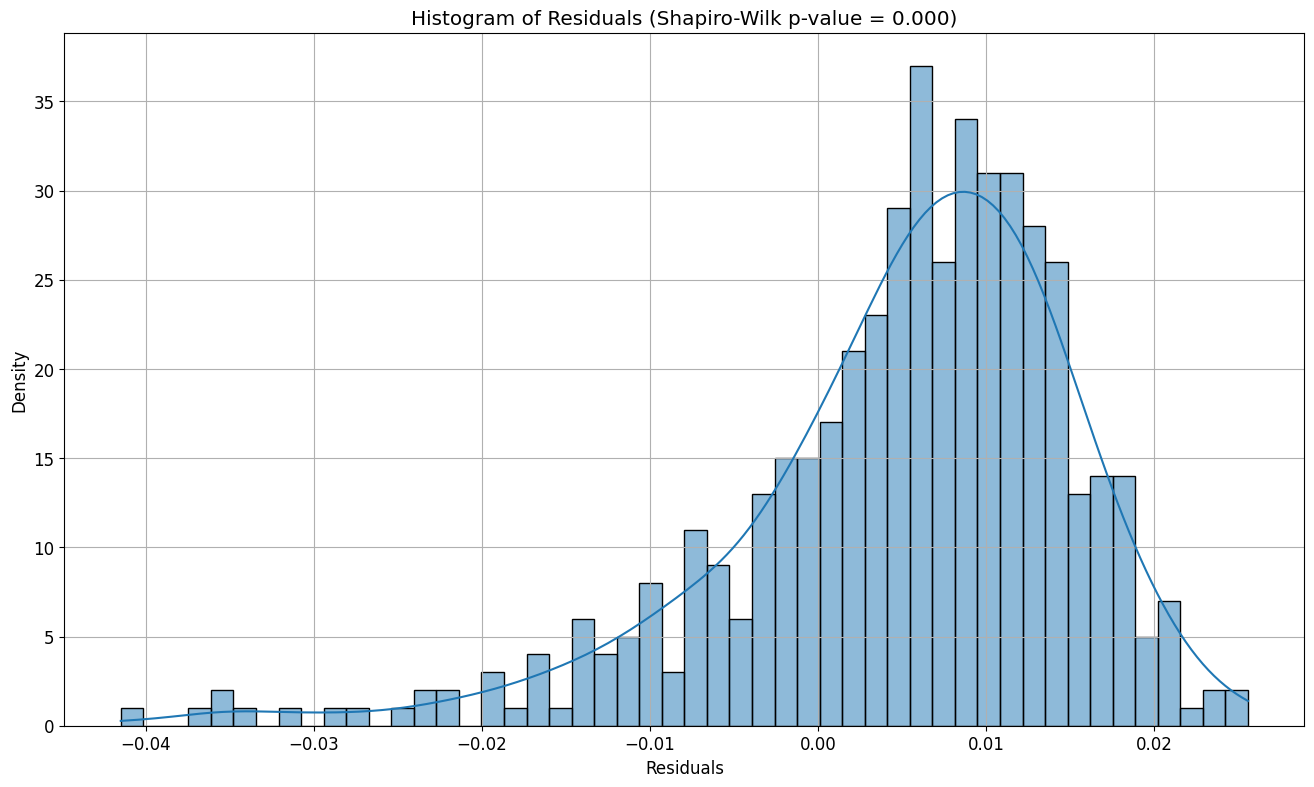

In [ ]:
# Initialize the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1)
])

# Compile the model with 'adam' optimizer
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with updated batch size and epochs
history = nn_model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=0)

# Predict on the training and testing set
y_train_pred = nn_model.predict(X_train, verbose=0)
y_test_pred = nn_model.predict(X_test, verbose=0)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred.flatten())
train_mse = mean_squared_error(y_train, y_train_pred.flatten())
train_rmse = sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred.flatten())

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred.flatten())
test_mse = mean_squared_error(y_test, y_test_pred.flatten())
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred.flatten())

# Print all training and testing metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print()
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R^2:", test_r2)

# Inverse scaling the predictions to get original scale
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_test_pred_inverse = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_test_pred_inverse, 'True vs Predicted Adj Close Price(Neural Network)')

# Create a density plot of the residuals.
residuals = y_test - y_test_pred.flatten()
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title(f'Histogram of Residuals (Shapiro-Wilk p-value = {shapiro(residuals)[1]:.3f})')
plt.show()

For the Neural Network model, we initialize a sequential model with three layers: two dense layers with 128 units and ReLU activation, followed by a single output layer. We compile the model using the 'adam' optimizer and mean squared error for the loss. The model is then trained on the training data for 200 epochs with a batch size of 16 and a validation split of 20%. After training, predictions are made for both the training and testing data. We then compute and print MAE, MSE, RMSE, and R² for both datasets to assess the model's performance. Lastly, we scale the predicted values back to their original scale for comparison and plot the true vs. predicted adjusted close prices using the plot_predictions function to visually evaluate the model's accuracy. Additionally, we plot a histogram of the residuals with a kernel density estimate to analyze the prediction errors and include the Shapiro-Wilk test p-value to assess the normality of the residuals.

## **Hyperparameter Tuning**

### Neural Network

Best parameters found: {'batch_size': 16, 'epochs': 200, 'optimizer': 'adam', 'neurons': 128}
Training MAE: 0.0028842661844259987
Training MSE: 1.870060956409263e-05
Training RMSE: 0.004324420141948817
Training R^2: 0.9997229423872129

Testing MAE: 0.005209468659144468
Testing MSE: 4.676433399457381e-05
Testing RMSE: 0.006838445290749485
Testing R^2: 0.995796668064271


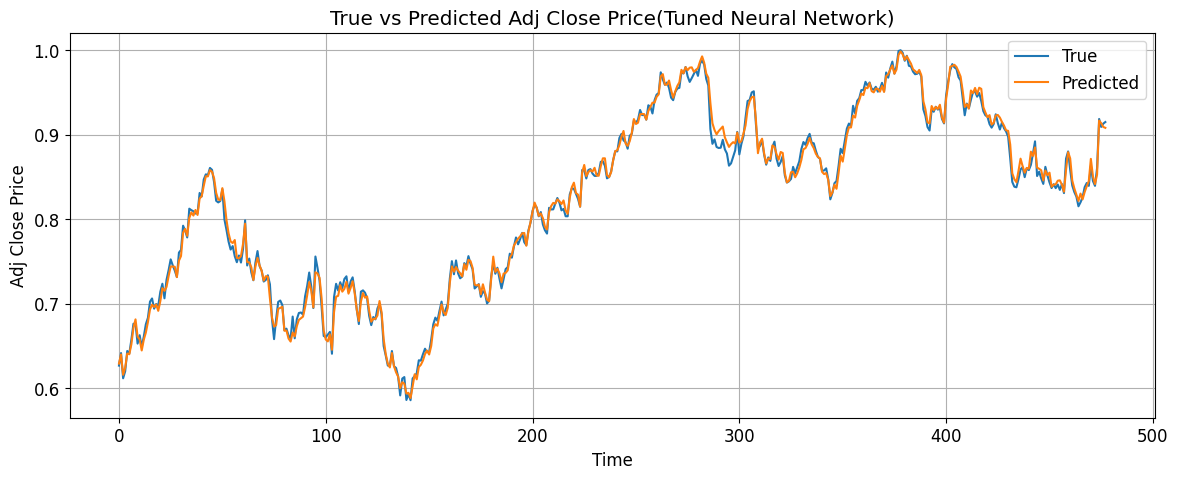

In [ ]:
# Define your hyperparameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [32, 64, 128]
}

# Define a function to create the model
def create_model(neurons, optimizer):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(neurons, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Function to get the optimizer
def get_optimizer(name):
    if name == 'adam':
        return Adam()
    elif name == 'rmsprop':
        return RMSprop()

best_score = np.inf
best_params = None
best_pred = None
best_train_metrics = {}
best_test_metrics = {}

# Iterate over all combinations of parameters
for params in product(*param_grid.values()):
    batch_size, epochs, opt_name, neurons = params
    optimizer = get_optimizer(opt_name)
    model = create_model(neurons, optimizer)

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # Predict on the testing set
    y_train_pred = model.predict(X_train, verbose=0)
    y_test_pred = model.predict(X_test, verbose=0)

    # Calculate metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for testing data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Update best score and params
    if test_mse < best_score:
        best_score = test_mse
        best_pred = y_test_pred
        best_params = {
            'batch_size': batch_size,
            'epochs': epochs,
            'optimizer': opt_name,
            'neurons': neurons
        }
        best_train_metrics = {
            'MSE': train_mse,
            'MAE': train_mae,
            'RMSE': train_rmse,
            'R²': train_r2
        }
        best_test_metrics = {
            'MSE': test_mse,
            'MAE': test_mae,
            'RMSE': test_rmse,
            'R²': test_r2
        }

# Output the best parameters and their corresponding metrics
print(f"Best parameters found: {best_params}")
print(f"Training MAE: {best_train_metrics['MAE']}")
print(f"Training MSE: {best_train_metrics['MSE']}")
print(f"Training RMSE: {best_train_metrics['RMSE']}")
print(f"Training R^2: {best_train_metrics['R²']}")
print()
print(f"Testing MAE: {best_test_metrics['MAE']}")
print(f"Testing MSE: {best_test_metrics['MSE']}")
print(f"Testing RMSE: {best_test_metrics['RMSE']}")
print(f"Testing R^2: {best_test_metrics['R²']}")

# Inverse scaling the predictions to get original scale
scaler = MinMaxScaler()
scaler.fit(apple_stocks_df_scaled[['Adj Close']])
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_test_pred_inverse = scaler.inverse_transform(best_pred.reshape(-1, 1))

# Plotting results
plot_predictions(y_test_inverse, y_test_pred_inverse, 'True vs Predicted Adj Close Price(Tuned Neural Network)')

For hyperparameter tuning, the code snippet above use a predefined grid of parameters, including batch size, number of epochs, optimizer type, and number of neurons. Then, it defines a model creation function that constructs a neural network based on specified parameters and trains it on the data. For each combination of parameters, it trains the model, makes predictions, calculates performance metrics (MAE, MSE, RMSE, R²) for both training and testing datasets, and compares them to find the best performing model based on testing MSE. Finally, it outputs the best parameters, their metrics, inversely scales the predictions to their original scale, and visualizes the best predictions compared to the actual data.

## **Model evaluation**

\ | Mean Absolute Error (MAE) | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) | R-Squared (R^2)
-------------------|------------------|------------------|------------------|------------------
Long Short-Term Memory | 0.013029194603711741 | 0.00025485680181864027 | 0.015964235084044594 | 0.9770926335816879
Lasso Regression | 0.0921409175061145 | 0.008889356868820805 | 0.09428338596391628 | 0.20099540775793856
Decision Tree | 0.018125469669470068 | 0.0008533186569625566 | 0.029211618526924464 | 0.9233009164082132
Random Forest | 0.019430876223914123 | 0.0010114773508109029 | 0.03180373171203189 | 0.9090850935368114
Support Vector Machine | 0.12045156982743842 | 0.020336016052309693 | 0.14260440404247582 | -0.8278679159225988
Gradient Booster Machine | 0.018672595736048077 | 0.0009057278653132666 | 0.030095313012382288 | 0.9185902046249047
Neural Network model | 0.009446080054503694 | 0.0001305678425009181 | 0.011426628658572838 | 0.988264133469173

For the baseline of each model, neural network performs the best at predicting stock market since it has the lowest MSE during testing. Its hyperparameters are tuned to find the lowest MSE possible:
<br><br/>
Best parameters found: {'batch_size': 16, 'epochs': 200, 'optimizer': 'adam', 'neurons': 128}
<br><br/>
Testing MAE: 0.005209468659144468

Testing MSE: 0.00004676433399457381

Testing RMSE: 0.006838445290749485

Testing R^2: 0.995796668064271